# Assignment 6 Answer

- Unless clearly indicated, the point of the code is to generate the visuals, and can therefore be ignored.

In [1]:
from scipy.integrate import odeint
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
# pip install phaseportrait
import phaseportrait

## Q1

A second order LTI system has the form:

$\dot{x} = Ax + Bu$

The free evolution of the system occurs when $u = 0$. The system has the form:

$\dot{x} = Ax$

The equlibrium of such a system is given by:

$Ax = 0$

To satisfy the graph, The point $(1, 1)$ must be an equilibrium point, and the point $(2, 2)$ must not and converge on $(1, 1)$.

$A \cdot [1, 1] = \vec{0}$

$A \cdot [2, 2] \ne \vec{0}$

A second order LTI system during its free evolution either has exactly one equilibrium at the origin, or infinite equilibrium along a line that passes through the origin.

Since the point $(1, 1)$ can be written as $k \cdot (2, 2)$, they are parallel and must therefore exist along the same line passing through the origin.

If $(1, 1)$ is to be an equilibrium point, then so must $(2, 2)$.

For this reason, **the system cannot be the free evolution of a second order LTI**.

## Q2

$A \in \mathbb{R}^{2 \times 2}$

$A = \begin{bmatrix} 0 & c_1 \\ c_2 & 2 \end{bmatrix}$

The number of linearly independent columns in $A$ is 1.

$rank(A) = 1$

## Q3

A generic matrix $A \in \mathbb{R}^{3 \times 2}$ has the form:

$A = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \\ a_{31} & a_{32} \end{bmatrix}$

### 1

Since the matrix transforms a 2d space into a 3d space, there is no $A^{-1}$ because not every point in the space that contains the co-domain corresponds to a point in the domain. An illustration of such a plane can be seen in the next point.

### 2

While the dimension of the matrix $A$ is 3 (number of rows), the range of such a matrix will be at most 2 dimensional, due to its 2 columns.

This means that the co-domain of $x$ when transformed by $A$ will either span a plane, line or point in 3d space. One example of this can be seen in the plot below, where the x,y plane is the domain, and the x,y,z plane is the co-domain.

In [2]:
x1, x2 = sp.symbols('x1 x2')

x = sp.Matrix([x1, x2])

A = sp.Matrix(
    [
        [8, 1],
        [1, 2],
        [3, 4],
    ]
)

tf = A@x
tf

Matrix([
[  8*x1 + x2],
[  x1 + 2*x2],
[3*x1 + 4*x2]])

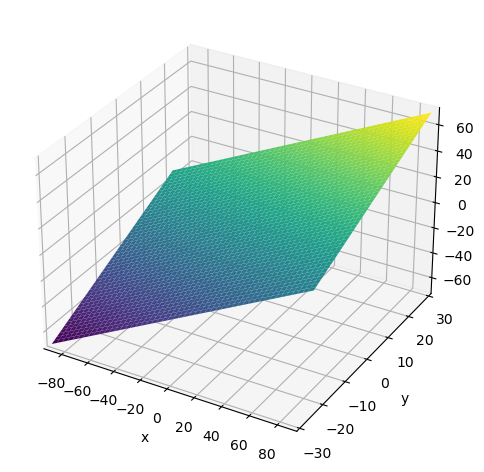

In [3]:
# Uncomment to make the plot interactive
# %matplotlib ipympl
ax = sp.plotting.plot3d_parametric_surface(tf[0], tf[1], tf[2], (x1, -10, 10), (x2, -10, 10))

### 3

From a control perspective the range is useful because it lets us map all possible inputs to the system to a potentially smaller set of outputs. In cases where the range is 1 dimensional, it is far easier to control the system, as we can only control one variable.

For example, the previous system looks like this when $x_2$ is constrained to $x_2=5$ (this could be done by some kind of controller), constraining it to a line:

In [4]:
constrained_tf = tf.subs(x2, 5)
constrained_tf

Matrix([
[ 8*x1 + 5],
[  x1 + 10],
[3*x1 + 20]])

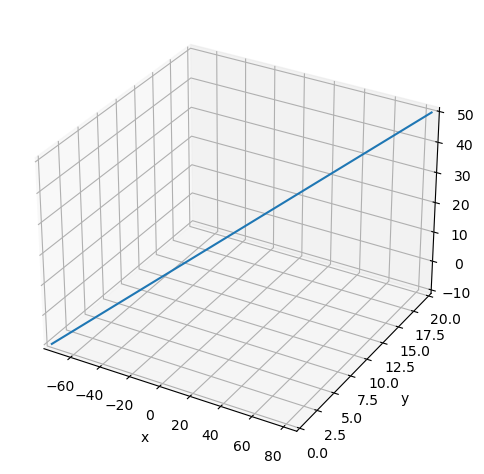

In [5]:
# Uncomment to make the plot interactive
# %matplotlib ipympl
ax = sp.plotting.plot3d_parametric_line(constrained_tf[0], constrained_tf[1], constrained_tf[2], (x1, -10, 10))

## Q4

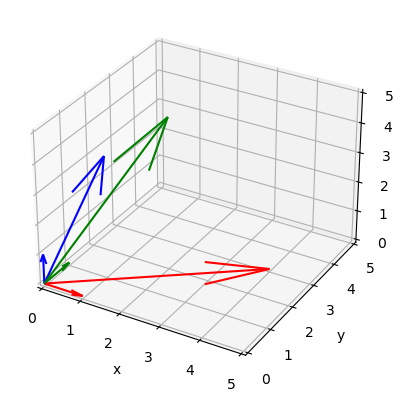

In [6]:
A = np.array([
    [4, 2, 1],
    [3, 2, 1],
    [0, 5, 4]
])

# Plot the columns of A as arrows in 3d

def plot_vector(ax, v, color):
    ax.quiver(0, 0, 0, v[0], v[1], v[2], color=color)

plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_zlim(0, 5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Plot the original unit vectors
plot_vector(ax, [1, 0, 0], 'r')
plot_vector(ax, [0, 1, 0], 'g')
plot_vector(ax, [0, 0, 1], 'b')

# Plot the new unit vectors
plot_vector(ax, A[:, 0], 'r')
plot_vector(ax, A[:, 1], 'g')
plot_vector(ax, A[:, 2], 'b')
plt.show()

The inverse of a matrix is the transformation that undoes the transformation of the original matrix. If the matrix is invertible, there will be exactly one solution for every point. The columns of A are linearly independent meaning that the matrix is invertible.

Since the matrix is invertible, there exists a linear combination of the columbs of $A$ that will result in the identity matrix. Each columb of $A^{-1}$ can be individully calculated as such:

$A = \begin{bmatrix}
4 & 2 & 1 \\
3 & 2 & 1 \\
0 & 5 & 4
\end{bmatrix}$

$A^{-1} = \begin{bmatrix}
a_{i11} & a_{i12} & a_{i13} \\
a_{i21} & a_{i22} & a_{i23} \\
a_{i31} & a_{i32} & a_{i33}
\end{bmatrix}$

$a_{i11} \begin{bmatrix}
4 \\
3 \\
0
\end{bmatrix} + a_{i21} \begin{bmatrix}
2 \\
2 \\
5
\end{bmatrix} + a_{i31} \begin{bmatrix}
1 \\
1 \\
4
\end{bmatrix} = \begin{bmatrix}
1 \\
0 \\
0
\end{bmatrix}$

$a_{i12} \begin{bmatrix}
4 \\
3 \\
0
\end{bmatrix} + a_{i22} \begin{bmatrix}
2 \\
2 \\
5
\end{bmatrix} + a_{i32} \begin{bmatrix}
1 \\
1 \\
4
\end{bmatrix} = \begin{bmatrix}
0 \\
1 \\
0
\end{bmatrix}$

$a_{i13} \begin{bmatrix}
4 \\
3 \\
0
\end{bmatrix} + a_{i23} \begin{bmatrix}
2 \\
2 \\
5
\end{bmatrix} + a_{i33} \begin{bmatrix}
1 \\
1 \\
4
\end{bmatrix} = \begin{bmatrix}
0 \\
0 \\
1
\end{bmatrix}$

Doing the calculations, we get:


$a \begin{bmatrix}
4 \\
3 \\
0
\end{bmatrix} + b \begin{bmatrix}
2 \\
2 \\
5
\end{bmatrix} + c \begin{bmatrix}
1 \\
1 \\
4
\end{bmatrix} = \begin{bmatrix}
1 \\
0 \\
0
\end{bmatrix}$

$4a + 2b + c = 1$\
$3a + 2b + c = 0$\
$5b + 4c = 0$

$c = (-5b)/4$\
$3a + 2b - 5b/4 = 0$\
$12a + 8b - 5b = 0$\
$12a + 3b = 0$\
$4a + b = 0$\
$b = -4a$

$c = (-5(-4a))/4$\
$c = 5a$

$4a + 2(-4a) + 5a = 1$\
$4a -8a + 5a = 1$\
$a = 1$

$a = 1$\
$b = -4a = -4$\
$c = 5a = 5$



and


$a \begin{bmatrix}
4 \\
3 \\
0
\end{bmatrix} + b \begin{bmatrix}
2 \\
2 \\
5
\end{bmatrix} + c \begin{bmatrix}
1 \\
1 \\
4
\end{bmatrix} = \begin{bmatrix}
0 \\
1 \\
0
\end{bmatrix}$

$4a + 2b + c = 0$\
$3a + 2b + c = 1$\
$5b + 4c = 0$

$c = -5b/4$

$3a + 2b - 5b/4 = 1$\
$12a + 8b - 5b = 4$\
$12a + 3b = 4$\
$3b = 4 - 12a$\
$b = 4/3 - 4a$

$c = -5(4/3 - 4a)/4$\
$c = -5(1/3 - a)$\
$c = -5/3 + 5a$

$4a + 2b + c = 0$\
$4a + 2(4/3 - 4a) + -5/3 + 5a = 0$\
$4a + 8/3 - 8a + -5/3 + 5a = 0$\
$a + 3/3 = 0$\
$a = -1$

$a = -1$\
$b = 4/3 - 4(-1) = 4/3 + 4 = 16/3$\
$c = -5/3 + 5(-1) = -5/3 - 5 = -20/3$

and


$a \begin{bmatrix}
4 \\
3 \\
0
\end{bmatrix} + b \begin{bmatrix}
2 \\
2 \\
5
\end{bmatrix} + c \begin{bmatrix}
1 \\
1 \\
4
\end{bmatrix} = \begin{bmatrix}
0 \\
0 \\
1
\end{bmatrix}$

$4a + 2b + c = 0$\
$3a + 2b + c = 0$\
$5b + 4c = 1$

$c = -4a - 2b$\
$3a + 2b - 4a - 2b = 0$\
$-a = 0$\
$a = 0$

$c = -4(0) - 2b$\
$c = -2b$

$5b + 4(-2b) = 1$\
$5b - 8b = 1$\
$-3b = 1$\
$b = -1/3$

$c = -2(-1/3)$\
$c = 2/3$

$a = 0$\
$b = -1/3$\
$c = 2/3$

From these calculations we have found:

$A^{-1} = \begin{bmatrix}
1 & -1 & 0 \\
-4 & 16/3 & -1/3 \\
5 & -20/3 & 2/3
\end{bmatrix}$

Comparing it to the result from numpy:

In [7]:
sp.Matrix(np.linalg.inv(A)).applyfunc(sp.nsimplify)

Matrix([
[ 1,    -1,    0],
[-4,  16/3, -1/3],
[ 5, -20/3,  2/3]])

Checking if this is correct by calculating the identity matrix:

In [8]:
A = np.array([
    [4, 2, 1],
    [3, 2, 1],
    [0, 5, 4]
])

A_i = np.array([
    [1, -1, 0],
    [-4, 16/3, -1/3],
    [5, -20/3, 2/3],
])

print(np.matrix.round(A_i@A))

[[ 1.  0.  0.]
 [ 0.  1. -0.]
 [ 0. -0.  1.]]


Checking if this is correct for a random point:

In [9]:
x = np.array([22, 5, 99])

b = A@x

print("x =", x)
print("Ax = b =", b)
print("A_i(b) = x = ", A_i@b)

x = [22  5 99]
Ax = b = [197 175 421]
A_i(b) = x =  [22.  5. 99.]


## Q5

### 1
- The kernel of a matrix $A=\mathbb{R}^{3 \times 3}$ is a set of all the points in the domain that are mapped to the origin in the co-domain.
    - This means for an autonomous LTI system that the system is in equilibrium.
- In the domain, the kernel is orthogonal to the rows of $A$.
    - If the dimension of the span of the rows of $A$ is 3, then the only orthogonal is the origin.
    - If the dimension of the span of the rows of $A$ is 2, then the kernel is a line.
    - If the dimension of the span of the rows of $A$ is 1, then the kernel is a plane.

### 2

Since the kernel represents the equilibrium of the process, it is useful for knowing where the system is stable. Typically one would linearize a system around the equilibrium point, and then uses the linearized system to determine its input.

### 3

- If the determinant is zero, then the kernel is either a line or a plane for a $\mathbb{R}^{3 \times 3}$ system, and the system can not be asymptotically stable since that requires both marginal stability and convergence.
- If the determinant is non-zero, then the kernel is the origin, and the system can potentially be asymptotically stable at the origin.



### 4

The determinant can indicate the stability regions of a system. Having this information is useful when attempting to control it. If the system is unstable, then it would require a very different type of controller than if it were stable. For a system with many dimensions, it is not always possible to visualize the stability regions, and the determinant can be used to gain additional insight.